In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [9]:
df.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(53940, 11)

# one hot encoding

In [12]:
df_ohe = pd.get_dummies(df)

In [13]:
df_ohe.shape

(53940, 28)

In [14]:
df_ohe = df_ohe.iloc[:,1:]

In [15]:
df_ohe.fillna(df_ohe.median(), inplace=True)

In [16]:
df_ohe.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [17]:
df_ohe.nunique()

carat              273
depth              184
table              127
price            11602
x                  554
y                  552
z                  375
cut_Fair             2
cut_Good             2
cut_Ideal            2
cut_Premium          2
cut_Very Good        2
color_D              2
color_E              2
color_F              2
color_G              2
color_H              2
color_I              2
color_J              2
clarity_I1           2
clarity_IF           2
clarity_SI1          2
clarity_SI2          2
clarity_VS1          2
clarity_VS2          2
clarity_VVS1         2
clarity_VVS2         2
dtype: int64

In [18]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

# X & Y split 

In [19]:
X = df_ohe
X.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False


In [20]:
X.shape

(53940, 27)

# train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, = train_test_split(X, test_size=0.3, random_state=7)

In [23]:
X_train.shape, X_test.shape

((37758, 27), (16182, 27))

# standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sd = StandardScaler()
sd.fit(X_train)

StandardScaler()

In [26]:
X_train.describe()

,carat,depth,table,price,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.797883,61.747548,57.452537,3935.724588,5.731350,5.734758,3.538770
std,0.473971,1.431517,2.230732,3995.660835,1.121605,1.146157,0.710144
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,954.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2409.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5294.000000,6.540000,6.530000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
X_train.loc[:,:] = sd.transform(X_train)

In [28]:
X_train.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,...,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04
mean,-5.269134e-17,-4.961266e-15,1.851160e-15,-4.215307e-17,4.685766e-16,2.657149e-16,4.945459e-16,-8.468251e-18,-6.134778e-17,3.603711e-17,...,3.199117e-18,6.736964e-17,2.709840e-17,6.097141e-17,-8.280068e-18,3.914214e-17,-1.806560e-17,1.147919e-17,3.801304e-17,-7.903701e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.261451e+00,-1.309646e+01,-6.030630e+00,-9.034231e-01,-5.110023e+00,-5.003531e+00,-4.983241e+00,-1.748409e-01,-3.142708e-01,-8.194642e-01,...,-3.343721e-01,-2.315250e-01,-1.179397e-01,-1.840405e-01,-5.649735e-01,-4.569860e-01,-4.225376e-01,-5.393662e-01,-2.691221e-01,-3.228949e-01
25%,-8.394779e-01,-5.222135e-01,-6.511570e-01,-7.462505e-01,-9.017108e-01,-8.766431e-01,-8.854246e-01,-1.748409e-01,-3.142708e-01,-8.194642e-01,...,-3.343721e-01,-2.315250e-01,-1.179397e-01,-1.840405e-01,-5.649735e-01,-4.569860e-01,-4.225376e-01,-5.393662e-01,-2.691221e-01,-3.228949e-01
50%,-2.065189e-01,3.664166e-02,-2.028676e-01,-3.821007e-01,-2.795108e-02,-2.160087e-02,-2.643208e-02,-1.748409e-01,-3.142708e-01,-8.194642e-01,...,-3.343721e-01,-2.315250e-01,-1.179397e-01,-1.840405e-01,-5.649735e-01,-4.569860e-01,-4.225376e-01,-5.393662e-01,-2.691221e-01,-3.228949e-01
75%,5.108347e-01,5.256400e-01,6.937111e-01,3.399421e-01,7.209858e-01,6.938426e-01,6.917420e-01,-1.748409e-01,-3.142708e-01,1.220310e+00,...,-3.343721e-01,-2.315250e-01,-1.179397e-01,-1.840405e-01,-5.649735e-01,-4.569860e-01,-4.225376e-01,-5.393662e-01,-2.691221e-01,-3.228949e-01
max,8.886993e+00,1.205203e+01,1.683213e+01,3.725910e+00,4.465670e+00,4.638625e+01,3.979702e+01,5.719484e+00,3.181969e+00,1.220310e+00,...,2.990680e+00,4.319188e+00,8.478909e+00,5.433585e+00,1.769995e+00,2.188251e+00,2.366654e+00,1.854028e+00,3.715785e+00,3.096983e+00


In [29]:
X_test.describe()

,carat,depth,table,price,x,y,z
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,0.798073,61.753739,57.468026,3925.975034,5.730708,5.733985,3.538648
std,0.474121,1.435230,2.243269,3975.000820,1.122159,1.132728,0.695239
min,0.200000,43.000000,43.000000,327.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,943.000000,4.700000,4.710000,2.910000
50%,0.700000,61.800000,57.000000,2387.000000,5.690000,5.710000,3.530000
75%,1.050000,62.500000,59.000000,5387.750000,6.540000,6.540000,4.040000
max,4.500000,72.200000,79.000000,18806.000000,10.230000,31.800000,6.720000


In [30]:
X_test.loc[:,:] = sd.transform(X_test)

In [31]:
X_test.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,...,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,0.000402,0.004325,0.006944,-0.002440,-0.000572,-0.000674,-0.000172,0.003643,0.012408,-0.015000,...,-0.000470,0.017918,0.000531,0.007935,0.001958,-0.020363,-0.000074,0.015129,0.002990,-0.005676
std,1.000330,1.002607,1.005634,0.994843,1.000508,0.988296,0.979025,1.010072,1.017591,0.996907,...,0.999407,1.035851,1.002249,1.020616,1.001208,0.982034,0.999959,1.009813,1.005167,0.992110
min,-1.261451,-13.096455,-6.478919,-0.903173,-5.110023,-5.003531,-4.983241,-0.174841,-0.314271,-0.819464,...,-0.334372,-0.231525,-0.117940,-0.184041,-0.564973,-0.456986,-0.422538,-0.539366,-0.269122,-0.322895
25%,-0.839478,-0.522214,-0.651157,-0.749004,-0.919543,-0.894093,-0.885425,-0.174841,-0.314271,-0.819464,...,-0.334372,-0.231525,-0.117940,-0.184041,-0.564973,-0.456986,-0.422538,-0.539366,-0.269122,-0.322895
50%,-0.206519,0.036642,-0.202868,-0.387607,-0.036867,-0.021601,-0.012350,-0.174841,-0.314271,-0.819464,...,-0.334372,-0.231525,-0.117940,-0.184041,-0.564973,-0.456986,-0.422538,-0.539366,-0.269122,-0.322895
75%,0.531933,0.525640,0.693711,0.363405,0.720986,0.702568,0.705824,-0.174841,-0.314271,1.220310,...,-0.334372,-0.231525,-0.117940,-0.184041,-0.564973,-0.456986,-0.422538,-0.539366,-0.269122,-0.322895
max,7.810962,7.301759,9.659499,3.721655,4.010959,22.741717,4.479758,5.719484,3.181969,1.220310,...,2.990680,4.319188,8.478909,5.433585,1.769995,2.188251,2.366654,1.854028,3.715785,3.096983


# k-means clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
mykmeans = KMeans(3, random_state=7)
# bcoz user has given k=3 i.e. 3 clusters 
# it is calculating 3 centroids and calculate distance from those 3 

In [34]:
mykmeans.fit(X_train)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=7)

In [35]:
# do the predictions/testing
cluster_nos = mykmeans.predict(X_test)

In [36]:
X_test.iloc[0,:]

carat           -0.565196
depth            1.014638
table           -1.099446
price           -0.707208
x               -0.500495
y               -0.484022
z               -0.378478
cut_Fair        -0.174841
cut_Good        -0.314271
cut_Ideal       -0.819464
cut_Premium     -0.585078
cut_Very Good    1.862933
color_D         -0.382675
color_E         -0.470519
color_F          2.154199
color_G         -0.512196
color_H         -0.427402
color_I         -0.334372
color_J         -0.231525
clarity_I1      -0.117940
clarity_IF      -0.184041
clarity_SI1     -0.564973
clarity_SI2      2.188251
clarity_VS1     -0.422538
clarity_VS2     -0.539366
clarity_VVS1    -0.269122
clarity_VVS2    -0.322895
Name: 40026, dtype: float64

In [37]:
cluster_nos[0]

2

In [38]:
cluster_nos.shape, X_test.shape

((16182,), (16182, 27))

In [39]:
X_test.loc[cluster_nos==0,:].shape

(4569, 27)

In [40]:
X_test.loc[cluster_nos==1,:].shape

(6395, 27)

In [41]:
X_test.loc[cluster_nos==2,:].shape

(5218, 27)

In [51]:
inertia_values = []
for k in range(2,31):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [52]:
inertia_values

[882121.2200555103,
 839541.7683634197,
 803316.2389601825,
 777179.9197143858,
 743951.4214137017,
 704670.3895826109,
 680096.3672800318,
 652330.5924530488,
 623942.5995687552,
 592373.8566241213,
 576744.3899988171,
 564589.8232266024,
 539197.9035479001,
 521910.04987030174,
 510505.2516836238,
 499792.6112785401,
 490673.92647767614,
 481770.8651476875,
 476959.27219272626,
 468002.69737596397,
 463213.01830195927,
 457526.7147393711,
 451826.9109287608,
 444187.58907706663,
 436828.7599650887,
 430988.11027898587,
 428690.78820760397,
 422050.98881108634,
 417210.2961590915]

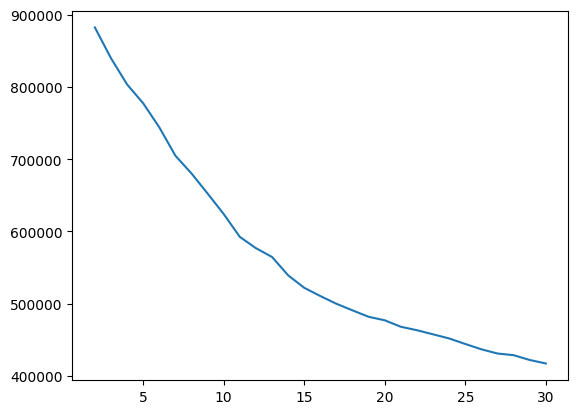

In [53]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,31)), inertia_values)

# evaluation parameters

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm

silhouette_score(X_test, cluster_nos)

0.08288491221345808

In [54]:
df_new = X_test[['x','y','z']]

In [55]:
df_new.head()

,x,y,z
40026,-0.500495,-0.484022,-0.378478
10489,0.346517,0.266322,0.494596
4454,0.337601,0.379745,0.396023
20007,0.640743,0.597868,0.691742
30486,-1.213768,-1.225640,-1.181143


In [56]:
df_new.shape

(16182, 3)

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16182 entries, 40026 to 36836
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       16182 non-null  float64
 1   y       16182 non-null  float64
 2   z       16182 non-null  float64
dtypes: float64(3)
memory usage: 505.7 KB


In [58]:
df_new.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [59]:
df_new.isnull().sum().sum()

0

In [60]:
df_new_ohe = pd.get_dummies(df_new)

In [61]:
df_new_ohe.shape

(16182, 3)

In [62]:
df_new_ohe = df_new_ohe.iloc[:,1:]

In [63]:
df_new_ohe.shape

(16182, 2)

In [64]:
df_new_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16182 entries, 40026 to 36836
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       16182 non-null  float64
 1   z       16182 non-null  float64
dtypes: float64(2)
memory usage: 379.3 KB


In [65]:
X1 = df_new_ohe

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X1_train,X1_test = train_test_split(X1, test_size=0.3, random_state=7)

In [69]:
X1_train.shape, X1_test.shape

((11327, 2), (4855, 2))

In [70]:
from sklearn.cluster import KMeans

In [71]:
mykmeans = KMeans(3,random_state=7)

In [72]:
# fit function for training
mykmeans.fit(X1_train)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=7)

In [73]:
# Do the predictions / testing
cluster_nos = mykmeans.predict(X1_test)

In [74]:
X1_test.iloc[0,:]

y   -1.208190
z   -1.167061
Name: 33450, dtype: float64

In [75]:
cluster_nos[0]

1

In [77]:
cluster_nos.shape, X1_test.shape

((4855,), (4855, 2))

In [79]:
X1_test.loc[cluster_nos == 0,:].shape

(1901, 2)

In [80]:
X1_test.loc[cluster_nos == 1,:].shape

(2208, 2)

In [81]:
X1_test.loc[cluster_nos == 2,:].shape

(746, 2)

In [82]:
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X1_train)
    inertia_values.append(mykmeans.inertia_)

C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [83]:
inertia_values

[6361.8816171583,
 3349.152752359763,
 1965.401392150518,
 1522.1407050550931,
 1143.4103515423421,
 821.7082586942181,
 638.1747547504526,
 468.7886888766417,
 416.69658520272776]

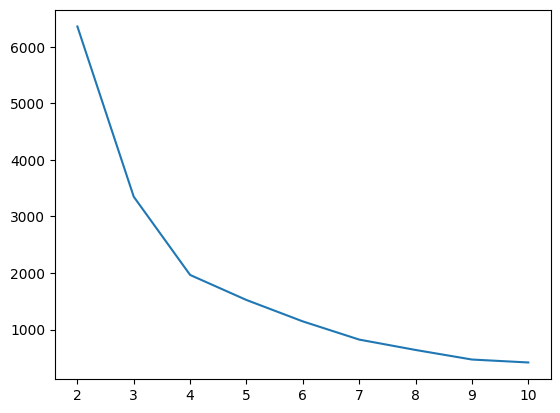

In [84]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
silhouette_score(X1_test, cluster_nos)

0.6033985060388264